In [0]:
#задание выполнялось в google colab, для открытия файла требуется нажать кнопку выбрать файлы 
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [0]:
# если требуется необходимо поменять название csv файла в квадратных скобках
import io
import pandas as pd
bank_data = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']), sep=';')
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
bank_data['y'] = bank_data['y'].map({'no':0, 'yes':1}) # кодирование нет - 0 да - 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f49a5b710>,
      dtype=object)

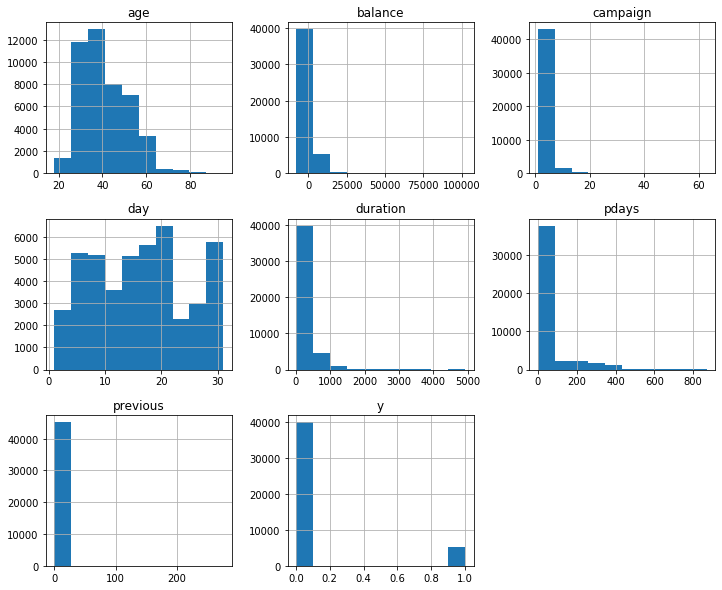

In [0]:
bank_data.hist(figsize=(12,10)) # гистограмы численных значений

In [0]:
bank_data['y'].value_counts() # несбалансированный датасет

0    39922
1     5289
Name: y, dtype: int64

In [0]:
bank_data['y'].value_counts()/len(bank_data)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [0]:
bank_data.corr() # корреляционная матрица

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


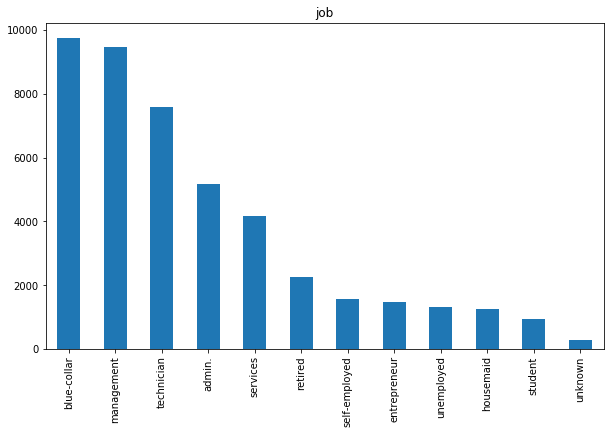

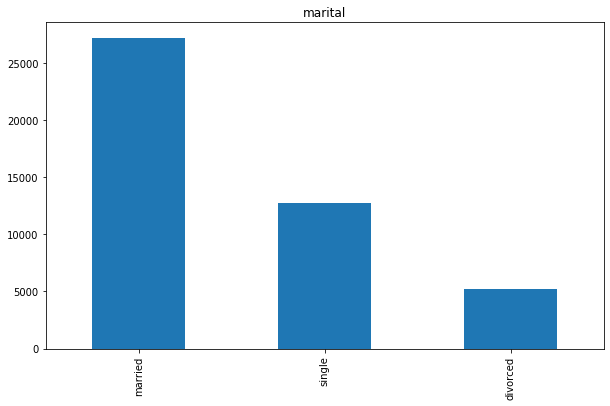

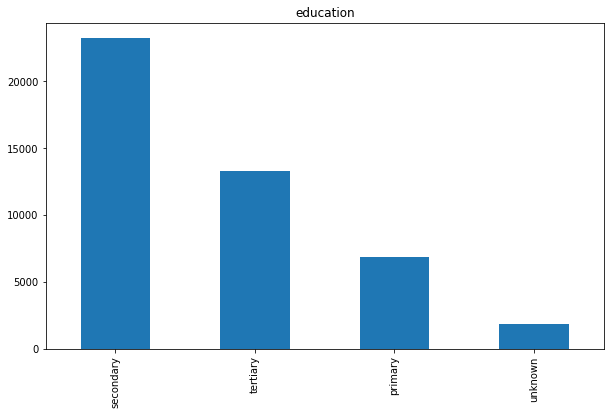

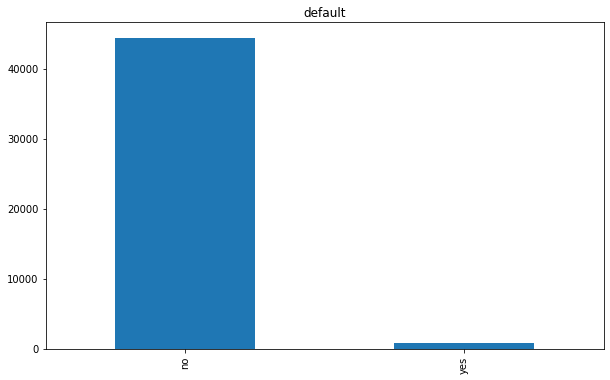

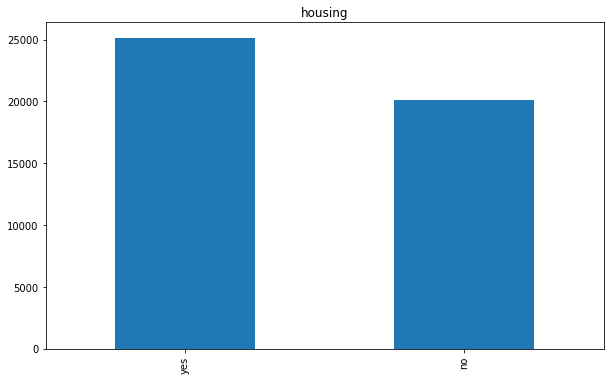

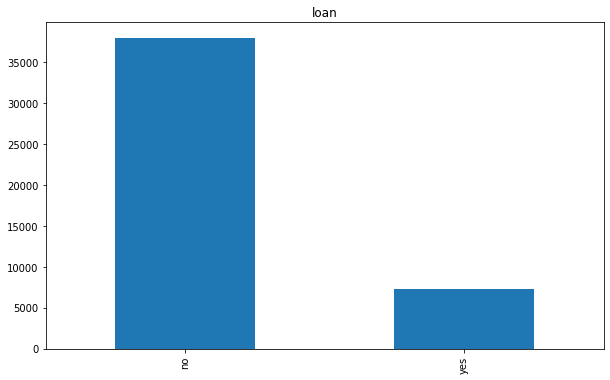

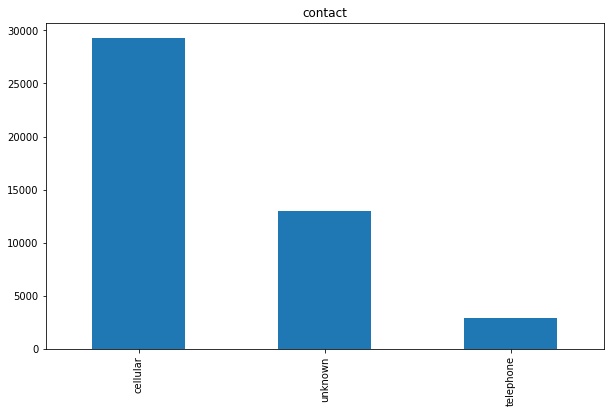

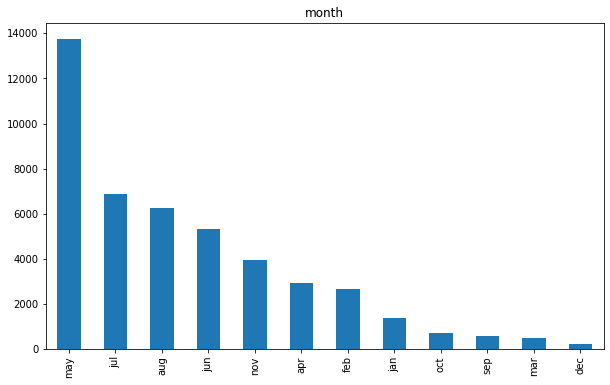

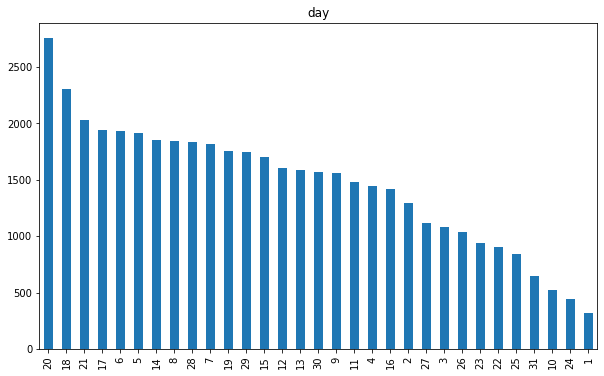

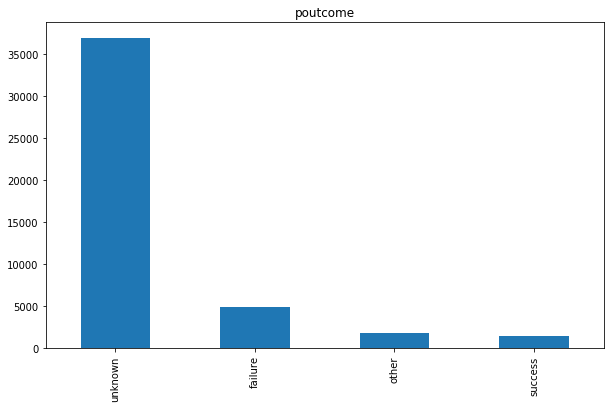

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

categorical = ['job','marital','education','default','housing','loan','contact','month','day','poutcome']
for i in categorical:
    bank_data[i].value_counts().plot(kind='bar',figsize = (10, 6),title=i)
    plt.show()

In [0]:
X = bank_data.iloc[:, 0:16]
Y = bank_data.iloc[:, 16]

In [0]:
#Splitting the catagorical variable to 0s and 1s using LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder().fit_transform(['no','yes'])
housing = LabelEncoder().fit_transform(X['housing'])
loan = LabelEncoder().fit_transform(X['loan'])
deposit = LabelEncoder().fit_transform(Y)
job = LabelEncoder().fit_transform(X['job'])
marital = LabelEncoder().fit_transform(X['marital'])
education = LabelEncoder().fit_transform(X['education'])
poutcome = LabelEncoder().fit_transform(X['poutcome'])

In [0]:
X['housing'] = housing
X['loan']= loan
X['job'] = job
X['marital']=marital
X['education']=education
X['poutcome']=poutcome
Y=deposit
del X['month']
del X['day']
del X['contact']
del X['default']

In [0]:
X

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,2143,1,0,261,1,-1,0,3
1,44,9,2,1,29,1,0,151,1,-1,0,3
2,33,2,1,1,2,1,1,76,1,-1,0,3
3,47,1,1,3,1506,1,0,92,1,-1,0,3
4,33,11,2,3,1,0,0,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,977,3,-1,0,3
45207,71,5,0,0,1729,0,0,456,2,-1,0,3
45208,72,5,1,1,5715,0,0,1127,5,184,3,2
45209,57,1,1,1,668,0,0,508,4,-1,0,3


In [0]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [0]:
X.shape

(45211, 12)

In [0]:
Y.shape

(45211,)

In [0]:
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,11])
X = onehotencoder.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X

array([[  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   1., ...,   1.,  -1.,   0.],
       ...,
       [  0.,   0.,   0., ...,   5., 184.,   3.],
       [  0.,   1.,   0., ...,   4.,  -1.,   0.],
       [  0.,   0.,   1., ...,   2., 188.,  11.]])

In [0]:
X.shape

(45211, 31)

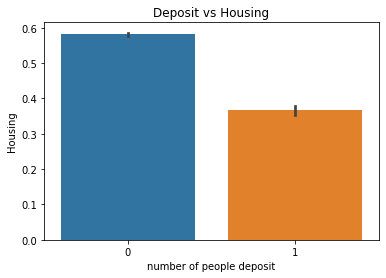

In [0]:
## Показатели соотношения между жильем и депозитом 
import seaborn as sns

sns.barplot(x=deposit, y=housing, data= bank_data)
plt.xlabel("number of people deposit")
plt.ylabel("Housing")
plt.title("Deposit vs Housing")
plt.show()

In [0]:
## spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 76)

In [0]:
##Feature scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
X_test.shape

(9043, 31)

##Ненасыщенные функции активации

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

In [0]:
#Leaky ReLU
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_149 (Dense)            (None, 300)               9600      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 2)                 202       
Total params: 39,902
Trainable params: 39,902
Non-trainable params: 0
_________________________________________________

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 3s 95us/sample - loss: 0.3321 - acc: 0.8737 - val_loss: 0.2748 - val_acc: 0.8955
Epoch 2/10
36168/36168 [==============================] - 3s 73us/sample - loss: 0.2636 - acc: 0.8980 - val_loss: 0.2673 - val_acc: 0.8957
Epoch 3/10
36168/36168 [==============================] - 3s 71us/sample - loss: 0.2589 - acc: 0.8987 - val_loss: 0.2633 - val_acc: 0.8964
Epoch 4/10
36168/36168 [==============================] - 3s 72us/sample - loss: 0.2560 - acc: 0.8988 - val_loss: 0.2628 - val_acc: 0.8958
Epoch 5/10
36168/36168 [==============================] - 3s 71us/sample - loss: 0.2539 - acc: 0.8986 - val_loss: 0.2602 - val_acc: 0.8965
Epoch 6/10
36168/36168 [==============================] - 3s 71us/sample - loss: 0.2519 - acc: 0.8997 - val_loss: 0.2593 - val_acc: 0.8956
Epoch 7/10
36168/36168 [==============================] - 3s 71us/sample - loss: 0.2505 - acc: 0.8997 - val_loss: 0.2

In [0]:
#PReLU
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 300)               9600      
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 300)               300       
_________________________________________________________________
dense_153 (Dense)            (None, 100)               30100     
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 100)               100       
_________________________________________________________________
dense_154 (Dense)            (None, 2)                 202       
Total params: 40,302
Trainable params: 40,302
Non-trainable params: 0
_________________________________________________

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 4s 109us/sample - loss: 0.3521 - acc: 0.8837 - val_loss: 0.2877 - val_acc: 0.8874
Epoch 2/10
36168/36168 [==============================] - 3s 86us/sample - loss: 0.2693 - acc: 0.8962 - val_loss: 0.2709 - val_acc: 0.8919
Epoch 3/10
36168/36168 [==============================] - 3s 87us/sample - loss: 0.2597 - acc: 0.8980 - val_loss: 0.2677 - val_acc: 0.8913
Epoch 4/10
36168/36168 [==============================] - 3s 88us/sample - loss: 0.2556 - acc: 0.8986 - val_loss: 0.2642 - val_acc: 0.8916
Epoch 5/10
36168/36168 [==============================] - 3s 86us/sample - loss: 0.2528 - acc: 0.8992 - val_loss: 0.2631 - val_acc: 0.8910
Epoch 6/10
36168/36168 [==============================] - 3s 85us/sample - loss: 0.2506 - acc: 0.8998 - val_loss: 0.2609 - val_acc: 0.8922
Epoch 7/10
36168/36168 [==============================] - 3s 87us/sample - loss: 0.2486 - acc: 0.8993 - val_loss: 0.

In [0]:
#SELU
model = keras.models.Sequential()
model.add(keras.layers.Flatten( input_shape=(31,)))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(2, activation="softmax"))

In [0]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_155 (Dense)            (None, 300)               9600      
_________________________________________________________________
dense_156 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_157 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_158 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_159 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_160 (Dense)            (None, 100)             

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 33s 914us/sample - loss: 0.3553 - acc: 0.8829 - val_loss: 0.3448 - val_acc: 0.8773
Epoch 2/10
36168/36168 [==============================] - 30s 834us/sample - loss: 0.3219 - acc: 0.8833 - val_loss: 0.3328 - val_acc: 0.8775
Epoch 3/10
36168/36168 [==============================] - 31s 851us/sample - loss: 0.3068 - acc: 0.8837 - val_loss: 0.3345 - val_acc: 0.8775
Epoch 4/10
36168/36168 [==============================] - 31s 854us/sample - loss: 0.3005 - acc: 0.8842 - val_loss: 0.3113 - val_acc: 0.8775
Epoch 5/10
36168/36168 [==============================] - 31s 853us/sample - loss: 0.3341 - acc: 0.8844 - val_loss: 0.3618 - val_acc: 0.8775
Epoch 6/10
36168/36168 [==============================] - 31s 861us/sample - loss: 0.3173 - acc: 0.8833 - val_loss: 0.3474 - val_acc: 0.8775
Epoch 7/10
36168/36168 [==============================] - 31s 856us/sample - loss: 0.3007 - acc: 0.8838 -

##Пакетная нормализация

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 31)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 31)                124       
_________________________________________________________________
dense_256 (Dense)            (None, 300)               9600      
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_257 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_258 (Dense)            (None, 2)               

In [0]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [0]:
bn1.updates

[<tf.Operation 'batch_normalization_6/cond_2/Merge' type=Merge>,
 <tf.Operation 'batch_normalization_6/cond_3/Merge' type=Merge>]

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 5s 139us/sample - loss: 0.5073 - acc: 0.7762 - val_loss: 0.3702 - val_acc: 0.8729
Epoch 2/10
36168/36168 [==============================] - 4s 113us/sample - loss: 0.3303 - acc: 0.8815 - val_loss: 0.3064 - val_acc: 0.8875
Epoch 3/10
36168/36168 [==============================] - 4s 110us/sample - loss: 0.2890 - acc: 0.8908 - val_loss: 0.2904 - val_acc: 0.8890
Epoch 4/10
36168/36168 [==============================] - 4s 104us/sample - loss: 0.2726 - acc: 0.8950 - val_loss: 0.2781 - val_acc: 0.8926
Epoch 5/10
36168/36168 [==============================] - 4s 113us/sample - loss: 0.2654 - acc: 0.8951 - val_loss: 0.2695 - val_acc: 0.8930
Epoch 6/10
36168/36168 [==============================] - 4s 106us/sample - loss: 0.2617 - acc: 0.8960 - val_loss: 0.2674 - val_acc: 0.8921
Epoch 7/10
36168/36168 [==============================] - 4s 105us/sample - loss: 0.2583 - acc: 0.8959 - val_lo

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="softmax")
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 6s 154us/sample - loss: 0.5111 - acc: 0.7784 - val_loss: 0.3494 - val_acc: 0.8830
Epoch 2/10
36168/36168 [==============================] - 4s 111us/sample - loss: 0.3239 - acc: 0.8840 - val_loss: 0.3023 - val_acc: 0.8900
Epoch 3/10
36168/36168 [==============================] - 4s 108us/sample - loss: 0.2886 - acc: 0.8912 - val_loss: 0.2848 - val_acc: 0.8920
Epoch 4/10
36168/36168 [==============================] - 4s 102us/sample - loss: 0.2755 - acc: 0.8933 - val_loss: 0.2764 - val_acc: 0.8922
Epoch 5/10
36168/36168 [==============================] - 4s 105us/sample - loss: 0.2679 - acc: 0.8958 - val_loss: 0.2722 - val_acc: 0.8936
Epoch 6/10
36168/36168 [==============================] - 4s 106us/sample - loss: 0.2619 - acc: 0.8958 - val_loss: 0.2681 - val_acc: 0.8949
Epoch 7/10
36168/36168 [==============================] - 4s 107us/sample - loss: 0.2597 - acc: 0.8953 - val_lo

##Ускоренные оптимизаторы


In [0]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [0]:
#SGD
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_262 (Dense)            (None, 300)               9600      
_________________________________________________________________
dense_263 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_264 (Dense)            (None, 2)                 202       
Total params: 39,902
Trainable params: 39,902
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 5s 135us/sample - loss: 0.2720 - acc: 0.8917 - val_loss: 0.2790 - val_acc: 0.8901
Epoch 2/10
36168/36168 [==============================] - 3s 94us/sample - loss: 0.2501 - acc: 0.8994 - val_loss: 0.2679 - val_acc: 0.8933
Epoch 3/10
36168/36168 [==============================] - 3s 95us/sample - loss: 0.2433 - acc: 0.8999 - val_loss: 0.2725 - val_acc: 0.8850
Epoch 4/10
36168/36168 [==============================] - 4s 97us/sample - loss: 0.2409 - acc: 0.9003 - val_loss: 0.2549 - val_acc: 0.8920
Epoch 5/10
36168/36168 [==============================] - 3s 94us/sample - loss: 0.2388 - acc: 0.9013 - val_loss: 0.2574 - val_acc: 0.8912
Epoch 6/10
36168/36168 [==============================] - 3s 95us/sample - loss: 0.2372 - acc: 0.9008 - val_loss: 0.2522 - val_acc: 0.8927
Epoch 7/10
36168/36168 [==============================] - 3s 92us/sample - loss: 0.2360 - acc: 0.9022 - val_loss: 0.

In [0]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [0]:
#Adagrad
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_265 (Dense)            (None, 300)               9600      
_________________________________________________________________
dense_266 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_267 (Dense)            (None, 2)                 202       
Total params: 39,902
Trainable params: 39,902
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 5s 133us/sample - loss: 0.3221 - acc: 0.8785 - val_loss: 0.2683 - val_acc: 0.8949
Epoch 2/10
36168/36168 [==============================] - 4s 98us/sample - loss: 0.2557 - acc: 0.8989 - val_loss: 0.2626 - val_acc: 0.8958
Epoch 3/10
36168/36168 [==============================] - 3s 96us/sample - loss: 0.2510 - acc: 0.8997 - val_loss: 0.2598 - val_acc: 0.8961
Epoch 4/10
36168/36168 [==============================] - 4s 98us/sample - loss: 0.2482 - acc: 0.8995 - val_loss: 0.2572 - val_acc: 0.8955
Epoch 5/10
36168/36168 [==============================] - 3s 94us/sample - loss: 0.2464 - acc: 0.8997 - val_loss: 0.2577 - val_acc: 0.8972
Epoch 6/10
36168/36168 [==============================] - 4s 97us/sample - loss: 0.2450 - acc: 0.9001 - val_loss: 0.2556 - val_acc: 0.8955
Epoch 7/10
36168/36168 [==============================] - 4s 102us/sample - loss: 0.2437 - acc: 0.9012 - val_loss: 0

In [0]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [0]:
#RMSprop
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 5s 150us/sample - loss: 0.2818 - acc: 0.8897 - val_loss: 0.2598 - val_acc: 0.8935
Epoch 2/10
36168/36168 [==============================] - 4s 108us/sample - loss: 0.2474 - acc: 0.8984 - val_loss: 0.2614 - val_acc: 0.8900
Epoch 3/10
36168/36168 [==============================] - 4s 108us/sample - loss: 0.2426 - acc: 0.9002 - val_loss: 0.2572 - val_acc: 0.8938
Epoch 4/10
36168/36168 [==============================] - 4s 107us/sample - loss: 0.2405 - acc: 0.9004 - val_loss: 0.2576 - val_acc: 0.8922
Epoch 5/10
36168/36168 [==============================] - 4s 104us/sample - loss: 0.2396 - acc: 0.9007 - val_loss: 0.2583 - val_acc: 0.8905
Epoch 6/10
36168/36168 [==============================] - 4s 103us/sample - loss: 0.2393 - acc: 0.9009 - val_loss: 0.2529 - val_acc: 0.8952
Epoch 7/10
36168/36168 [==============================] - 4s 103us/sample - loss: 0.2385 - acc: 0.9008 - val_lo

In [0]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [0]:
#Adam
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 6s 172us/sample - loss: 0.2876 - acc: 0.8877 - val_loss: 0.2569 - val_acc: 0.8957
Epoch 2/10
36168/36168 [==============================] - 5s 134us/sample - loss: 0.2468 - acc: 0.8977 - val_loss: 0.2566 - val_acc: 0.8956
Epoch 3/10
36168/36168 [==============================] - 5s 140us/sample - loss: 0.2416 - acc: 0.8997 - val_loss: 0.2534 - val_acc: 0.8932
Epoch 4/10
36168/36168 [==============================] - 5s 140us/sample - loss: 0.2389 - acc: 0.9002 - val_loss: 0.2562 - val_acc: 0.8903
Epoch 5/10
36168/36168 [==============================] - 5s 146us/sample - loss: 0.2374 - acc: 0.9016 - val_loss: 0.2492 - val_acc: 0.8969
Epoch 6/10
36168/36168 [==============================] - 5s 141us/sample - loss: 0.2366 - acc: 0.9018 - val_loss: 0.2522 - val_acc: 0.8906
Epoch 7/10
36168/36168 [==============================] - 5s 129us/sample - loss: 0.2374 - acc: 0.9012 - val_lo

In [0]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [0]:
#Adamax
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 5s 141us/sample - loss: 0.2722 - acc: 0.8936 - val_loss: 0.2718 - val_acc: 0.8892
Epoch 2/10
36168/36168 [==============================] - 4s 102us/sample - loss: 0.2507 - acc: 0.8967 - val_loss: 0.2580 - val_acc: 0.8910
Epoch 3/10
36168/36168 [==============================] - 4s 101us/sample - loss: 0.2437 - acc: 0.8981 - val_loss: 0.2583 - val_acc: 0.8914
Epoch 4/10
36168/36168 [==============================] - 4s 102us/sample - loss: 0.2403 - acc: 0.9006 - val_loss: 0.2496 - val_acc: 0.8928
Epoch 5/10
36168/36168 [==============================] - 4s 105us/sample - loss: 0.2388 - acc: 0.9006 - val_loss: 0.2527 - val_acc: 0.8906
Epoch 6/10
36168/36168 [==============================] - 4s 101us/sample - loss: 0.2363 - acc: 0.9029 - val_loss: 0.2505 - val_acc: 0.8919
Epoch 7/10
36168/36168 [==============================] - 4s 107us/sample - loss: 0.2349 - acc: 0.9025 - val_lo

In [0]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [0]:
#Nadam
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [0]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 6s 160us/sample - loss: 0.2823 - acc: 0.8891 - val_loss: 0.2727 - val_acc: 0.8863
Epoch 2/10
36168/36168 [==============================] - 4s 113us/sample - loss: 0.2465 - acc: 0.8987 - val_loss: 0.2514 - val_acc: 0.8930
Epoch 3/10
36168/36168 [==============================] - 4s 119us/sample - loss: 0.2407 - acc: 0.8998 - val_loss: 0.2495 - val_acc: 0.8926
Epoch 4/10
36168/36168 [==============================] - 4s 116us/sample - loss: 0.2391 - acc: 0.9001 - val_loss: 0.2535 - val_acc: 0.8909
Epoch 5/10
36168/36168 [==============================] - 5s 130us/sample - loss: 0.2375 - acc: 0.9009 - val_loss: 0.2513 - val_acc: 0.8927
Epoch 6/10
36168/36168 [==============================] - 4s 121us/sample - loss: 0.2367 - acc: 0.9016 - val_loss: 0.2517 - val_acc: 0.8923
Epoch 7/10
36168/36168 [==============================] - 4s 116us/sample - loss: 0.2356 - acc: 0.9008 - val_lo

### Exponential Scheduling


In [0]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10

In [0]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 6s 169us/sample - loss: 0.3105 - acc: 0.8792 - val_loss: 0.3936 - val_acc: 0.8530
Epoch 2/10
36168/36168 [==============================] - 4s 114us/sample - loss: 0.2847 - acc: 0.8865 - val_loss: 0.2930 - val_acc: 0.8756
Epoch 3/10
36168/36168 [==============================] - 4s 115us/sample - loss: 0.2727 - acc: 0.8871 - val_loss: 0.3315 - val_acc: 0.8857
Epoch 4/10
36168/36168 [==============================] - 4s 113us/sample - loss: 0.2598 - acc: 0.8931 - val_loss: 0.2863 - val_acc: 0.8828
Epoch 5/10
36168/36168 [==============================] - 4s 112us/sample - loss: 0.2535 - acc: 0.8935 - val_loss: 0.2506 - val_acc: 0.8970
Epoch 6/10
36168/36168 [==============================] - 4s 113us/sample - loss: 0.2484 - acc: 0.8950 - val_loss: 0.3229 - val_acc: 0.8524
Epoch 7/10
36168/36168 [==============================] - 4s 114us/sample - loss: 0.2441 - acc: 0.8983 - val_lo

### Piecewise Constant Scheduling

In [0]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [0]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [0]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

Train on 36168 samples, validate on 9043 samples
Epoch 1/25
36168/36168 [==============================] - 6s 168us/sample - loss: 0.3111 - acc: 0.8799 - val_loss: 0.7803 - val_acc: 0.7568
Epoch 2/25
36168/36168 [==============================] - 4s 124us/sample - loss: 0.3047 - acc: 0.8820 - val_loss: 0.4791 - val_acc: 0.8775
Epoch 3/25
36168/36168 [==============================] - 4s 122us/sample - loss: 0.2871 - acc: 0.8841 - val_loss: 0.2969 - val_acc: 0.8909
Epoch 4/25
36168/36168 [==============================] - 4s 118us/sample - loss: 0.2778 - acc: 0.8872 - val_loss: 0.3125 - val_acc: 0.8485
Epoch 5/25
36168/36168 [==============================] - 4s 119us/sample - loss: 0.2736 - acc: 0.8902 - val_loss: 0.3715 - val_acc: 0.8796
Epoch 6/25
36168/36168 [==============================] - 4s 114us/sample - loss: 0.2454 - acc: 0.8978 - val_loss: 0.2637 - val_acc: 0.8767
Epoch 7/25
36168/36168 [==============================] - 4s 121us/sample - loss: 0.2444 - acc: 0.8976 - val_lo

### Performance Scheduling

In [0]:

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(2, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

Train on 36168 samples, validate on 9043 samples
Epoch 1/25
36168/36168 [==============================] - 6s 166us/sample - loss: 0.2794 - acc: 0.8891 - val_loss: 0.2670 - val_acc: 0.8886
Epoch 2/25
36168/36168 [==============================] - 4s 105us/sample - loss: 0.2575 - acc: 0.8946 - val_loss: 0.2620 - val_acc: 0.8890
Epoch 3/25
36168/36168 [==============================] - 4s 110us/sample - loss: 0.2548 - acc: 0.8937 - val_loss: 0.2938 - val_acc: 0.8851
Epoch 4/25
36168/36168 [==============================] - 4s 107us/sample - loss: 0.2529 - acc: 0.8939 - val_loss: 0.2625 - val_acc: 0.8925
Epoch 5/25
36168/36168 [==============================] - 4s 107us/sample - loss: 0.2533 - acc: 0.8951 - val_loss: 0.2652 - val_acc: 0.8871
Epoch 6/25
36168/36168 [==============================] - 4s 109us/sample - loss: 0.2490 - acc: 0.8954 - val_loss: 0.2577 - val_acc: 0.8943
Epoch 7/25
36168/36168 [==============================] - 4s 110us/sample - loss: 0.2475 - acc: 0.8965 - val_lo

## Dropout

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=(31,)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_test, y_test))

Train on 36168 samples, validate on 9043 samples
Epoch 1/10
36168/36168 [==============================] - 7s 184us/sample - loss: 0.3206 - acc: 0.8838 - val_loss: 0.2631 - val_acc: 0.8928
Epoch 2/10
36168/36168 [==============================] - 5s 137us/sample - loss: 0.2716 - acc: 0.8944 - val_loss: 0.2485 - val_acc: 0.8964
Epoch 3/10
36168/36168 [==============================] - 5s 136us/sample - loss: 0.2679 - acc: 0.8955 - val_loss: 0.2553 - val_acc: 0.8962
Epoch 4/10
36168/36168 [==============================] - 5s 135us/sample - loss: 0.2671 - acc: 0.8954 - val_loss: 0.2501 - val_acc: 0.8951
Epoch 5/10
36168/36168 [==============================] - 5s 135us/sample - loss: 0.2637 - acc: 0.8950 - val_loss: 0.2519 - val_acc: 0.8878
Epoch 6/10
36168/36168 [==============================] - 5s 136us/sample - loss: 0.2667 - acc: 0.8953 - val_loss: 0.2507 - val_acc: 0.8916
Epoch 7/10
36168/36168 [==============================] - 5s 134us/sample - loss: 0.2654 - acc: 0.8963 - val_lo

Вывод: из оптимизаторов наилучший результат на 10 эпохах показал ADAMAX(0.9039).
Наилучший результат из всех получил с помощью Piecewise Constant Scheduling(0.9104). 